In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.optimizers import Adam, RMSprop
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

import time
import os
import shutil
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import seaborn as sns
sns.set()
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

C:\Users\asus\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\asus\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\asus\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\asus\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (

In [2]:
train_dir = "C:/Users/asus/OneDrive/Documents/A.I/Face_Recognition/Dataset/Train/"
test_dir = "C:/Users/asus/OneDrive/Documents/A.I/Face_Recognition/Dataset/Test/"

In [3]:
train_gen = ImageDataGenerator(rescale = 1./255)
test_gen = ImageDataGenerator(rescale = 1./255)

In [4]:
train_data = train_gen.flow_from_directory(directory = train_dir,
                                           batch_size = 1,
                                           color_mode = 'grayscale',
                                           shuffle = False,
                                           class_mode = "categorical",
                                           target_size =  (100, 100))



test_data = test_gen.flow_from_directory(directory = test_dir,
                                         batch_size = 1,
                                         color_mode = 'grayscale',
                                         shuffle = False,
                                         class_mode = "categorical",
                                         target_size = (100, 100))

Found 308 images belonging to 44 classes.
Found 132 images belonging to 44 classes.


In [5]:
def dataset_to_nparray(generator, model = 'BPNN'):
    arr = generator[0][0][0].flatten()
    for i in range(1, len(generator)):
        features = generator[i][0][0].flatten()
        arr = np.vstack((arr, features))
    return arr

In [6]:
image_data = dataset_to_nparray(train_data).reshape((308, 100, 100))
labels = np.unique(train_data.labels)

In [7]:
X_train = dataset_to_nparray(train_data)
y_train = np.array(train_data.labels)

X_train.shape


(308, 10000)

In [8]:
X_test = dataset_to_nparray(test_data)
y_test = np.array(test_data.labels)

X_test.shape

(132, 10000)

In [9]:
pca = PCA()

pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [10]:
pca = PCA(n_components = 200, whiten=True)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [11]:
StartTime=time.time()
clf = MLPClassifier(solver='adam',
                      hidden_layer_sizes=(64,),
                      batch_size=10,
                      learning_rate_init=0.01,
                      early_stopping=True,
                      activation='relu',
                      alpha=0.01,
                      shuffle=False)

clf.fit(X_train_pca, y_train)

MLPClassifier(activation='relu', alpha=0.01, batch_size=10, beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(64,), learning_rate='constant',
              learning_rate_init=0.01, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=False, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [12]:
train_pred = clf.predict(X_train_pca)
train_acc = accuracy_score(y_train, train_pred)

train_val_score = clf.validation_scores_
train_loss =clf.loss_curve_

EndTime=time.time()
timeTakenTrain = EndTime-StartTime

print(f'Training Recognition Rate: {train_acc}')
print("Total Time : ", timeTakenTrain, 'seconds')

Training Recognition Rate: 0.9512987012987013
Total Time :  0.5870471000671387 seconds


In [13]:
StartTime=time.time()
test_pred= clf.predict(X_test_pca)
test_acc = accuracy_score(y_test, test_pred)

test_val_score = clf.validation_scores_
test_loss = clf.loss_curve_

EndTime=time.time()
timeTakenTest = EndTime-StartTime

print(f'Testing Recognition Rate= {test_acc}')
print("Total Time Taken=", timeTakenTest, 'seconds ')

Testing Recognition Rate= 0.7803030303030303
Total Time Taken= 0.003997802734375 seconds 


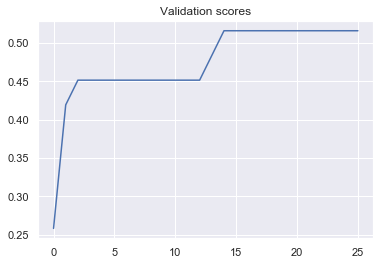

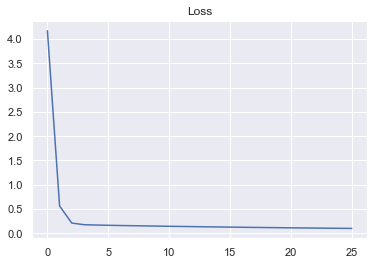

In [14]:
plt.plot(train_val_score)
plt.title('Validation scores')
plt.show()
plt.plot(train_loss )
plt.title('Loss')
plt.show()

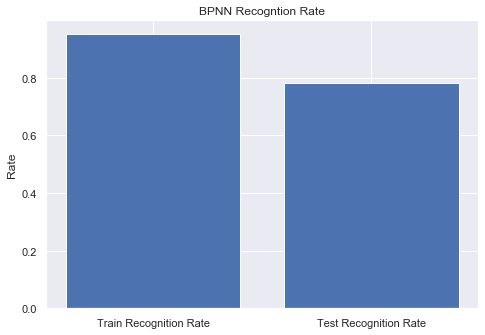

 Train Recognition rate = 0.9512987012987013
 Test Recognition rate =  0.7803030303030303


In [15]:
fig = plt.figure()
bx = fig.add_axes([0,0,1,1])
x = ['Train Recognition Rate', 'Test Recognition Rate']
y = np.array([train_acc,test_acc])
bx.bar(x,y)
bx.set_ylabel('Rate')
bx.set_title('BPNN Recogntion Rate')
plt.show()

print(" Train Recognition rate =",train_acc)
print(" Test Recognition rate = ",test_acc )



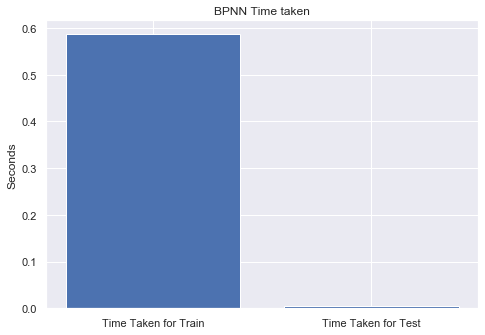

Time Taken for training=  0.5870471000671387 seconds
Time Taken for testing=  0.003997802734375 seconds 


In [17]:
fig = plt.figure()
bx = fig.add_axes([0,0,1,1])
bx.set_title('BPNN Time taken')
bx.set_ylabel('Seconds')
x = ['Time Taken for Train', 'Time Taken for Test']
y = np.array([timeTakenTrain,timeTakenTest])
bx.bar(x,y)
plt.show()
print("Time Taken for training= ", timeTakenTrain, 'seconds')
print("Time Taken for testing= ", timeTakenTest, 'seconds ')